# Hierarchical Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('datasets_626341_1116242_wine-clustering.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

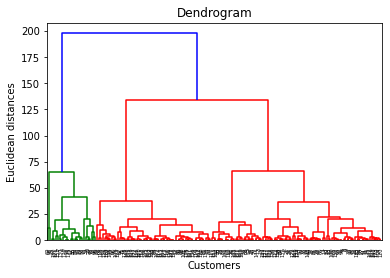

In [3]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [4]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = cluster.fit_predict(X)

In [5]:
dataset["Cluster"] = y_hc
cluster_data = dataset.groupby(by = "Cluster").mean()
cluster_data_count = []
for i in range(3):
  cluster_data_count.append((dataset.Cluster[dataset.Cluster == i]).count())

cluster_data["Count"] = cluster_data_count

In [6]:
cluster_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Count
Cluster,,,,,,,,,,,,,,
0,13.160549,2.339890,2.401209,18.754945,101.670330,2.369121,2.106044,0.349451,1.576484,5.413736,0.964571,2.606703,854.879121,91
1,13.327692,2.066538,2.511923,19.526923,125.115385,2.531538,2.463462,0.306538,1.875769,5.521154,0.977692,2.802308,884.038462,26
2,12.622623,2.446066,2.252787,20.585246,86.049180,2.083934,1.729672,0.403934,1.490984,4.330164,0.938197,2.537869,527.344262,61
